#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df = pd.read_csv('honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

#### Data Exploration

In [4]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [5]:
# check for missing values
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [6]:
# summary statistics of the data
print(df.describe())

              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     985.000000   985.000000  9.850000e+02  9.850000e+02  985.000000   
mean    62892.385787    58.402030  4.035132e+06  1.167187e+06    1.969594   
std     94163.791917    19.291695  6.752290e+06  2.088589e+06    1.177922   
min      2000.000000     3.000000  8.400000e+04  8.000000e+03    0.490000   
25%      9000.000000    45.000000  4.690000e+05  1.080000e+05    1.200000   
50%     26000.000000    55.000000  1.488000e+06  3.600000e+05    1.700000   
75%     68000.000000    70.000000  3.780000e+06  1.217000e+06    2.360000   
max    530000.000000   136.000000  4.641000e+07  1.380000e+07    8.230000   

          prodvalue         year  
count  9.850000e+02   985.000000  
mean   5.939911e+06  2009.291371  
std    9.806595e+06     6.962251  
min    1.620000e+05  1998.000000  
25%    1.037000e+06  2003.000000  
50%    2.409000e+06  2009.000000  
75%    5.897000e+06  2015.000000  
max    8.385900e+07  2021.

#### Visualization

##### Qn 1: How has honey production yield changed from 1998 to 2021?

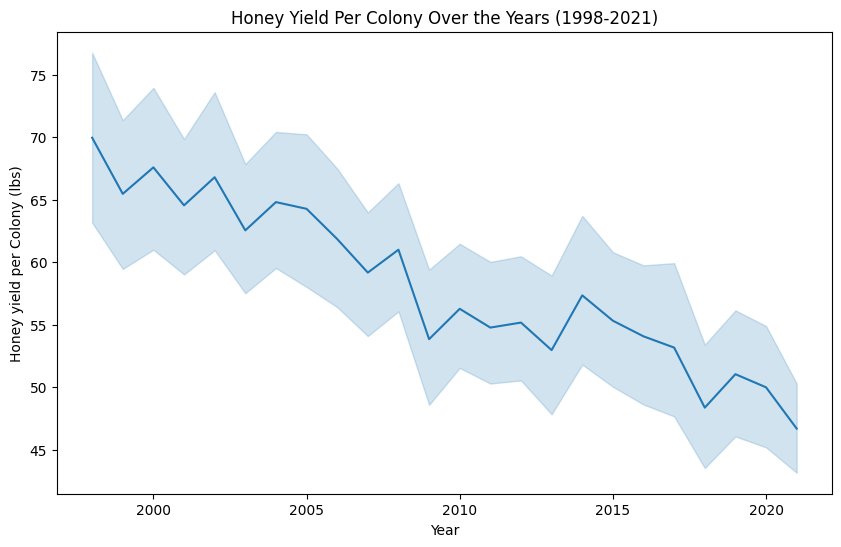

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='yieldpercol')
plt.title('Honey Yield Per Colony Over the Years (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Honey yield per Colony (lbs)')
plt.show()

##### Qn 2. Major production trends across the states over time

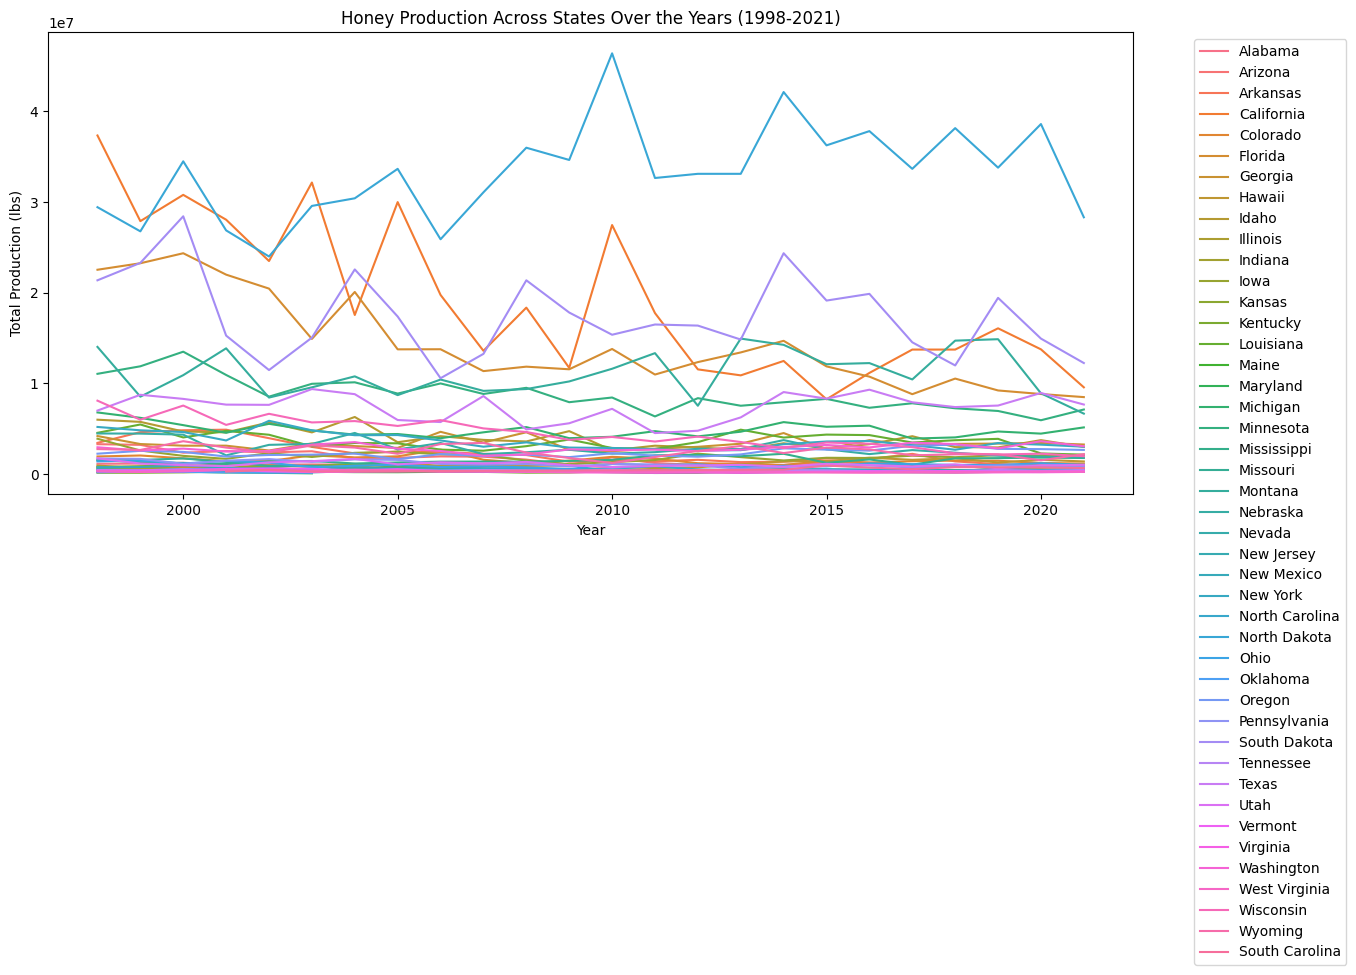

In [8]:
plt.figure(figsize=(14, 6))
sns.lineplot(df, x='year', y='totalprod', hue='State')
plt.title('Honey Production Across States Over the Years (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Total Production (lbs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Qn 3. Honey producing colonies and yield per colony trends before 2006

In [9]:
# Data before 2006
before2006data = df[df['year'] < 2006]
before2006data['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005], dtype=int64)

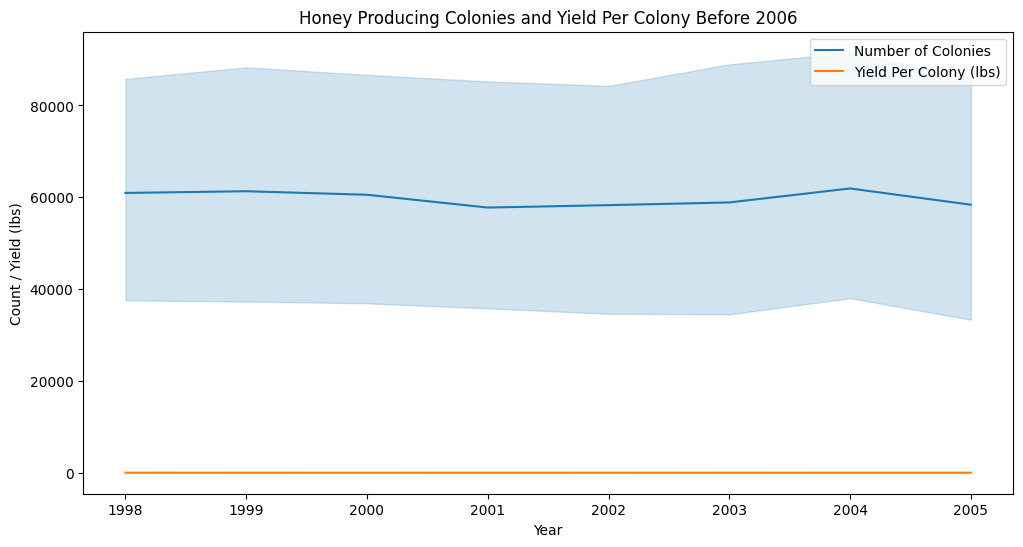

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(before2006data, x='year', y='numcol', label='Number of Colonies')
sns.lineplot(before2006data, x='year', y='yieldpercol', label='Yield Per Colony (lbs)')
plt.title('Honey Producing Colonies and Yield Per Colony Before 2006')
plt.xlabel('Year')
plt.ylabel('Count / Yield (lbs)')
plt.legend()
plt.show()

#####  Qn 4. Patterns between total honey production and value of production every year

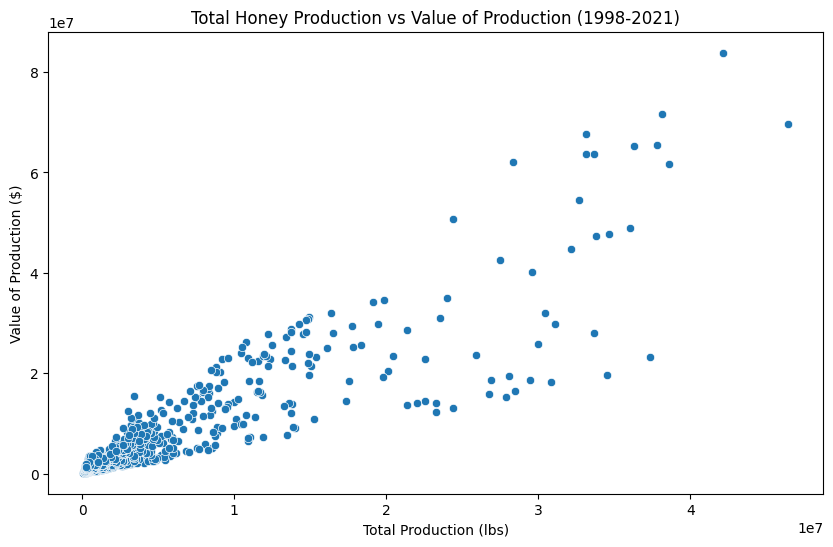

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='totalprod', y='prodvalue')
plt.title('Total Honey Production vs Value of Production (1998-2021)')
plt.xlabel('Total Production (lbs)')
plt.ylabel('Value of Production ($)')
plt.show()

##### Qn 5. Value of production (tied to demand) change every year

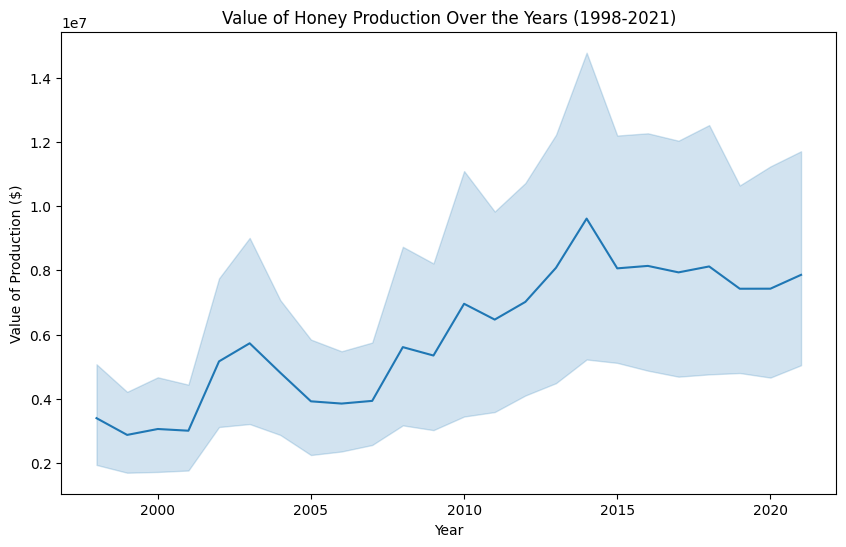

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='prodvalue')
plt.title('Value of Honey Production Over the Years (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Value of Production ($)')
plt.show()

#### Qn 6. Constructs the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.

In [13]:
# Creating new Dataframe of numerical columns, (except state)
df1 = df.iloc[:,1:]

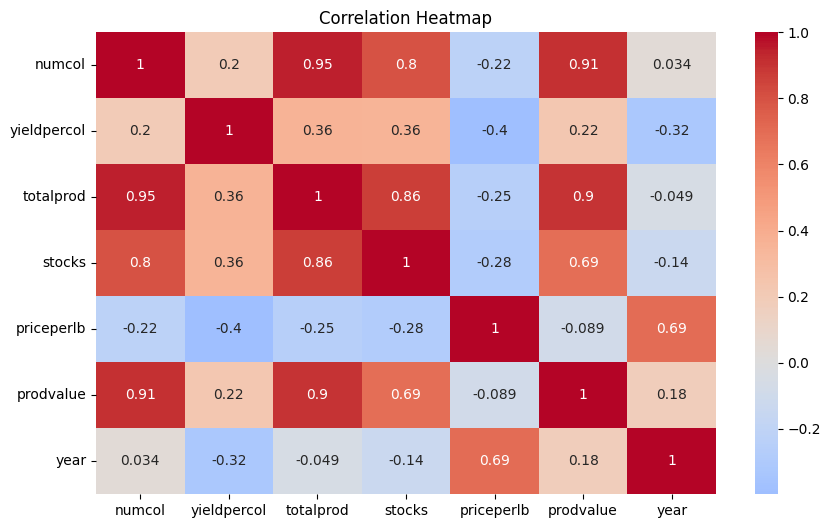

In [14]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()